442 10
0.08873797175546949


Text(0, 0.5, 'Prediction')

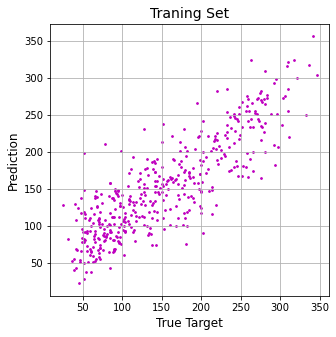

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

diabetes = datasets.load_diabetes() 
X = diabetes.data 
y = diabetes.target 

def gaussian(x,u,sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u)/sigma))

N,p = X.shape
print(N,p)

#Space for design matrix
#
M = 200
U = np.zeros((N,M))

#Basic Function locations at random
#
C = np.random.randn(M,p)

#Basic Function Range as distance between two random data
#
x1 = X[np.floor(np.random.rand()*N).astype(int),:]
x2 = X[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)
print(sigma)

#Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)

#Psedu inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

#Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, yh, c = 'm', s=3)
ax.grid(True)
ax.set_title("Traning Set", fontsize=14)
ax.set_xlabel("True Target", fontsize =12)
ax.set_ylabel("Prediction", fontsize =12)


In [10]:
print(X)
print(X.shape)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
(442, 10)


In [12]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
print(X_scaled.shape)
print(X_scaled.mean(axis=0))  # column mean: array([ 0.,  0.,  0.])
print(X_scaled.std(axis=0))  # column standard deviation: array([ 1.,  1.,  1.])

(442, 10)
[-9.54490383e-18 -8.38946810e-17  2.41134413e-17  2.05968977e-17
 -5.92788764e-17 -5.45064245e-17  5.32505161e-17  2.71778578e-16
  2.95138474e-18 -2.02515229e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
P = 10000
D = 0
for i in range(P):
    x1 = X_scaled[np.floor(np.random.rand()*N).astype(int),:]
    x2 = X_scaled[np.floor(np.random.rand()*N).astype(int),:]
    xd = np.linalg.norm(x1-x2)
    D += xd
D = D/P
print(D)


4.274625358335878


In [29]:
from sklearn import cluster
N_cluster = 25
model_kmeans = cluster.KMeans(N_cluster, random_state = 0)
Me = model_kmeans.fit(X_scaled)
centers = model_kmeans.cluster_centers_ 
print(Me)
q,w = centers.shape
print(q,w)
print(centers)

KMeans(n_clusters=25, random_state=0)
25 10
[[ 0.35319157  1.06548848  0.1123098   0.65630593  0.83071454  1.34693255
  -1.00643867  1.44168969  0.19294591 -0.37098854]
 [-1.60808425 -0.93853666 -1.11181208 -0.83468808 -1.26797799 -1.323573
   0.50162451 -1.1585246  -0.85966999 -0.88008805]
 [ 0.13580044 -0.93853666  1.17204048  1.31680957 -0.01477172 -0.25682844
   0.13677662 -0.25793162  0.48714198  0.29987164]
 [ 0.51793203 -0.93853666 -0.43297973  0.19685123 -0.29188887 -0.16472552
  -0.10940475 -0.22595135 -0.14683056  0.36486122]
 [-0.91357646 -0.93853666 -0.53205297 -0.78540219  0.23057847  0.33301061
  -0.39643718  0.27607851  0.26500159 -0.70964391]
 [ 0.32106779 -0.82720193 -0.61765629 -0.57227679  0.99555681  0.54843963
   1.80091966 -0.68763953 -0.34305313 -0.54515416]
 [-0.84144948  1.06548848  0.0961243  -0.23181231 -0.24672944 -0.01006651
  -1.18765765  0.99455703  0.70800238 -0.31777126]
 [ 0.11843924  1.06548848 -0.38754312 -0.30558115 -0.8020647  -0.74386964
   0.0137

In [30]:
# Splir data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)

309 10
133 10
4.274625358335878


Text(0, 0.5, 'Prediction')

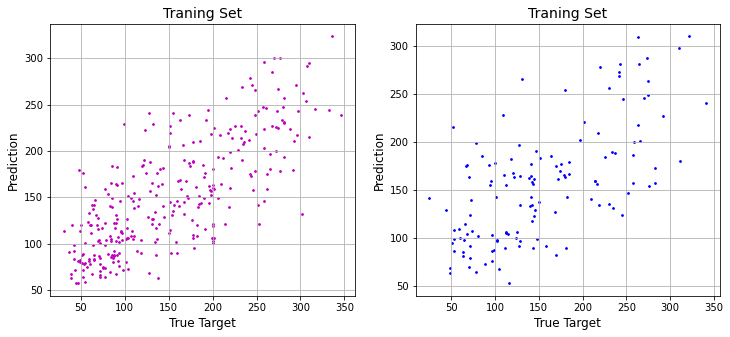

In [31]:
N0,p0 = X_train.shape
print(N0,p0)
N00,p00 = X_test.shape
print(N00,p00)
#Space for design matrix
#
M = 25
U0 = np.zeros((N0,M))
U00 = np.zeros((N00,M))

#Basic Function locations at Kmeans centers
#
C0 = centers

#Basic Function Range as average distance between multiple sets
#
sigma0 = D
print(sigma0)

#Construct the design matrix
#
for i in range(N0):
    for j in range(M):
        U0[i,j] = gaussian(X_train[i,:], C0[j,:], sigma0)
        
for i in range(N00):
    for j in range(M):
        U00[i,j] = gaussian(X_test[i,:], C0[j,:], sigma0)

#Psedu inverse solution for linear part
#
l0 = np.linalg.inv(U0.T @ U0) @ U0.T @ y_train

#Predicted values on training data
#
yh0 = U0 @ l0
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5))
ax[0].scatter(y_train, yh0, c = 'm', s=3)
ax[0].grid(True)
ax[0].set_title("Traning Set", fontsize=14)
ax[0].set_xlabel("True Target", fontsize =12)
ax[0].set_ylabel("Prediction", fontsize =12)

yt0 = U00 @ l0
ax[1].scatter(y_test, yt0, c = 'b', s=3)
ax[1].grid(True)
ax[1].set_title("Traning Set", fontsize=14)
ax[1].set_xlabel("True Target", fontsize =12)
ax[1].set_ylabel("Prediction", fontsize =12)

# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, yt0))